In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from function import helper

[2024/11/05 20:38:47] ppocr DEBUG: Namespace(alpha=1.0, alphacolor=(255, 255, 255), benchmark=False, beta=1.0, binarize=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\ADMIN/.paddleocr/whl\\cls\\ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='C:\\Users\\ADMIN/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None,

In [7]:
colnames = ['license_plate', 'time_violation', 'name_img']
df = pd.read_csv('license_plate.csv', names=colnames, header=None)

In [8]:
df

,license_plate,time_violation,name_img
0,24A-078.16,1.730620e+09,24A-078.161730619574.7678475
1,24A-078.16,1.730620e+09,24A-078.161730619575.1223333
2,24A-078.16,1.730620e+09,24A-078.161730619575.2324684
3,24A-078.16,1.730620e+09,24A-078.161730619575.3385282
4,24A-078.16,1.730620e+09,24A-078.161730619575.4484758
...,...,...,...
121,248-008.18,1.730620e+09,248-008.181730620121.8727055
122,248-008.18,1.730620e+09,248-008.181730620122.0271788
123,248-008.18,1.730620e+09,248-008.181730620122.1675637
124,248-008.18,1.730620e+09,248-008.181730620122.307919


In [9]:
df['license_plate'].unique()

array(['24A-078.16', '24-X1', '24-X1-124.42', '24A', '24A-009.19',
       '24C-140.58', '24-81-593.47', '24G-001.10', '24A-063.10',
       '29-61-49333', '29-61-493.33', '24A-115.11', '24A-07570',
       '24A-075.70', '19-H5-3000', '19-H5-3080', '24-82-261.89',
       '24C-112.54', '26A-155.77', '211-225.66', '24A-177.06',
       '24-81-944.57', '2-81-36659', '2-81-366.59', '24-81-36659',
       '248-008.18'], dtype=object)

In [10]:
df['license_plate'].nunique()

26

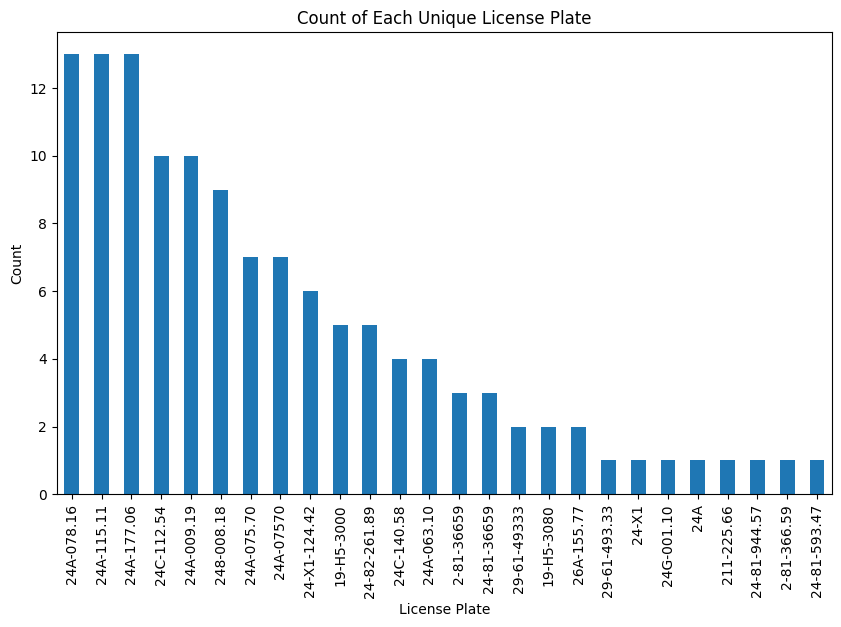

In [11]:
license_plate_counts = df['license_plate'].value_counts()

plt.figure(figsize=(10, 6))
license_plate_counts.plot(kind='bar')
plt.xlabel('License Plate')
plt.ylabel('Count')
plt.title('Count of Each Unique License Plate')
plt.xticks(rotation=90)
plt.show()

In [13]:
total_count = len(df)  # Tổng số biển số trong DataFrame
license_plate_percentage = (license_plate_counts / total_count) * 100
license_plate_percentage

license_plate
24A-078.16      10.317460
24A-115.11      10.317460
24A-177.06      10.317460
24C-112.54       7.936508
24A-009.19       7.936508
248-008.18       7.142857
24A-075.70       5.555556
24A-07570        5.555556
24-X1-124.42     4.761905
19-H5-3000       3.968254
24-82-261.89     3.968254
24C-140.58       3.174603
24A-063.10       3.174603
2-81-36659       2.380952
24-81-36659      2.380952
29-61-49333      1.587302
19-H5-3080       1.587302
26A-155.77       1.587302
29-61-493.33     0.793651
24-X1            0.793651
24G-001.10       0.793651
24A              0.793651
211-225.66       0.793651
24-81-944.57     0.793651
2-81-366.59      0.793651
24-81-593.47     0.793651
Name: count, dtype: float64

In [15]:
# Step 3: Lọc các biển số ngoại lai dựa trên ngưỡng phần trăm
# Ví dụ: Giữ lại những biển số có số lần xuất hiện chiếm ít nhất 5% tổng số biển số
threshold_percentage = 5  # Thay đổi ngưỡng theo ý bạn
frequent_plates = license_plate_percentage[license_plate_percentage > threshold_percentage].index

# Step 4: Lọc các hàng có biển số nằm trong danh sách không ngoại lai
df_filtered = df[df['license_plate'].isin(frequent_plates)]

# Hiển thị kết quả sau khi lọc
print(df_filtered)

    license_plate  time_violation                      name_img
0      24A-078.16    1.730620e+09  24A-078.161730619574.7678475
1      24A-078.16    1.730620e+09  24A-078.161730619575.1223333
2      24A-078.16    1.730620e+09  24A-078.161730619575.2324684
3      24A-078.16    1.730620e+09  24A-078.161730619575.3385282
4      24A-078.16    1.730620e+09  24A-078.161730619575.4484758
..            ...             ...                           ...
121    248-008.18    1.730620e+09  248-008.181730620121.8727055
122    248-008.18    1.730620e+09  248-008.181730620122.0271788
123    248-008.18    1.730620e+09  248-008.181730620122.1675637
124    248-008.18    1.730620e+09   248-008.181730620122.307919
125    248-008.18    1.730620e+09   248-008.181730620122.445769

[82 rows x 3 columns]


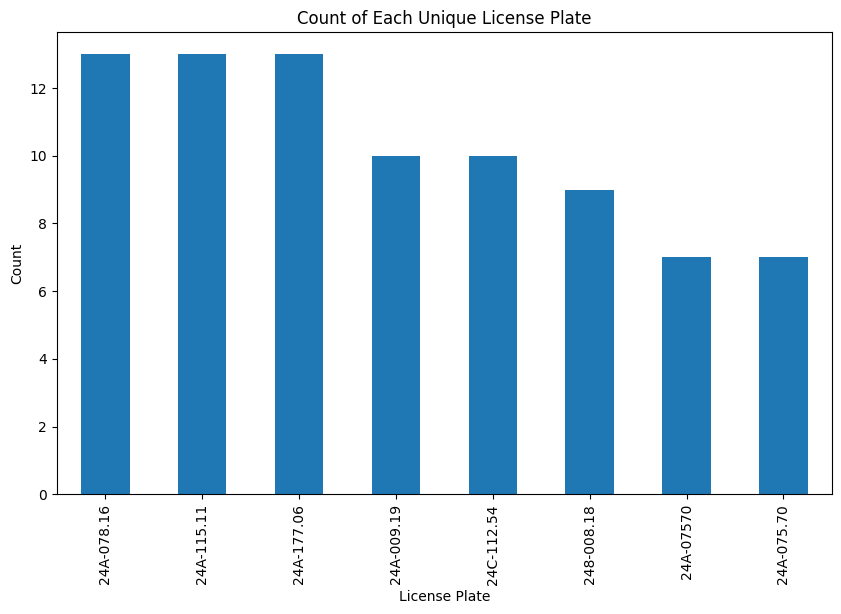

In [16]:
license_plate1_counts = df_filtered['license_plate'].value_counts()

plt.figure(figsize=(10, 6))
license_plate1_counts.plot(kind='bar')
plt.xlabel('License Plate')
plt.ylabel('Count')
plt.title('Count of Each Unique License Plate')
plt.xticks(rotation=90)
plt.show()